In [2]:
import pandas as pd
from budgetsvm import optimization

df = pd.read_json("~/Downloads/4_dim_experiments/results/1681921939.3240924.json")

df["budget_percentage"] = df["model_name"].apply(
    lambda x: float(x.split("_")[0]) if "full" not in x else 1.0
)

total_train_time_sec = df.train_time.sum()
df.train_time = df.train_time.div(60)
df = df.rename({"train_time": "train_time_min"}, axis=1)

df_success = df.dropna().copy()
# df_success = df.copy()
# df_success["score"] = df_success.score.apply(lambda x: x if type(x)==float else "0.0")

df_success = df_success.astype(
    {
        "dataset": "string",
        "model_name": "string",
        "optimal": "bool",
        "params": "object",
        "score": "float",
        "budget": "float",
        "num_sv": "float",
        "train_time_min": "float",
    }
)


full_budget_score = df_success.query("budget==inf")[["dataset", "score"]]
df_success = df_success.join(
    full_budget_score.set_index("dataset"), on="dataset", rsuffix="_full_budget"
)
df_success["score_ratio"] = df_success["score"] / df_success["score_full_budget"]

df_success

,dataset,model_UUID,model_name,optimal,params,score,budget,num_sv,train_time_min,budget_percentage,score_full_budget,score_ratio
0,757604aeba5ac717aedfb29d9a31e752,a6b832fe-fbc7-4d2a-acd2-ce7279a2f061,full_budget,True,"{'C': 1, 'kernel': 'GaussianKernel()'}",0.643333,inf,53.0,4.055760,1.0,0.643333,1.000000
1,757604aeba5ac717aedfb29d9a31e752,64f985eb-3898-43e0-821e-6c643655b74f,0.90_budget,False,"{'C': 100, 'budget': 47, 'kernel': 'LinearKern...",0.526667,47.0,4.0,27.172202,0.9,0.643333,0.818653
2,757604aeba5ac717aedfb29d9a31e752,5810db5e-b931-4889-8e8d-5471caf8030b,0.80_budget,False,"{'C': 10, 'budget': 42, 'kernel': 'PolynomialK...",0.573333,42.0,6.0,17.791348,0.8,0.643333,0.891192
3,757604aeba5ac717aedfb29d9a31e752,f85986aa-5572-4b0c-b168-f3ba32b2dd4b,0.70_budget,False,"{'C': 0.1, 'budget': 37, 'kernel': 'LinearKern...",0.606667,37.0,4.0,28.068683,0.7,0.643333,0.943005
4,757604aeba5ac717aedfb29d9a31e752,e537be0d-3cf2-4ada-a7c7-2a52b99c8ee7,0.60_budget,False,"{'C': 100, 'budget': 31, 'kernel': 'Polynomial...",0.556667,31.0,10.0,26.866652,0.6,0.643333,0.865285
5,757604aeba5ac717aedfb29d9a31e752,b5375e1c-020c-424b-ac50-5e1e2b8ac9f3,0.50_budget,False,"{'C': 10, 'budget': 26, 'kernel': 'PolynomialK...",0.433333,26.0,7.0,18.446190,0.5,0.643333,0.673575
6,757604aeba5ac717aedfb29d9a31e752,fc754c1d-5ae1-45a6-9248-395353cdcc2d,0.40_budget,False,"{'C': 1, 'budget': 21, 'kernel': 'PolynomialKe...",0.456667,21.0,7.0,27.925212,0.4,0.643333,0.709845
7,d5dad1c313a990324f71313359ce36c3,9e82c507-d5d9-406d-80e1-17bb4694dc13,full_budget,True,"{'C': 1, 'kernel': 'GaussianKernel()'}",0.770000,inf,69.0,4.058232,1.0,0.770000,1.000000
8,d5dad1c313a990324f71313359ce36c3,a535d1d9-09b6-41cb-a87a-34d0ed6ca85b,0.90_budget,True,"{'C': 100, 'budget': 62, 'kernel': 'LinearKern...",0.413333,62.0,2.0,18.843375,0.9,0.770000,0.536797
9,d5dad1c313a990324f71313359ce36c3,aeefc15b-b485-440f-af10-a1fd20b6f401,0.80_budget,False,"{'C': 10, 'budget': 55, 'kernel': 'PolynomialK...",0.506667,55.0,10.0,30.365638,0.8,0.770000,0.658009


In [3]:
import datetime

print(f"{datetime.timedelta(seconds=total_train_time_sec)} tot. training time")

6:58:25.535900 tot. training time


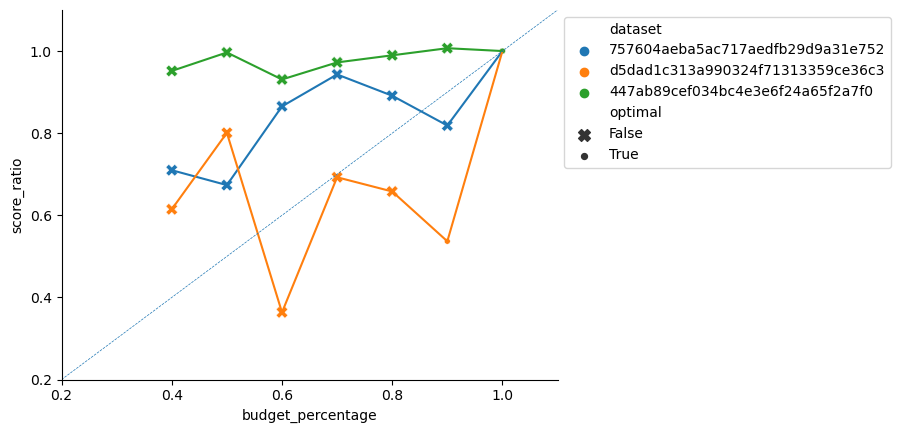

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

sns.lineplot(
    data=df_success,
    x="budget_percentage",
    y="score_ratio",
    hue="dataset",
    orient="x",
    legend=False,
    ax=ax,
)
g = sns.scatterplot(
    data=df_success,
    x="budget_percentage",
    y="score_ratio",
    hue="dataset",
    style="optimal",
    size="optimal",
    markers={True: "o", False: "X"},
    ax=ax,
)
plt.axline((0, 0), (1, 1), linestyle="--", linewidth=0.5)

ax.set(xlim=(0.2, 1.1))
ax.set(ylim=(0.2, 1.1))

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.despine()

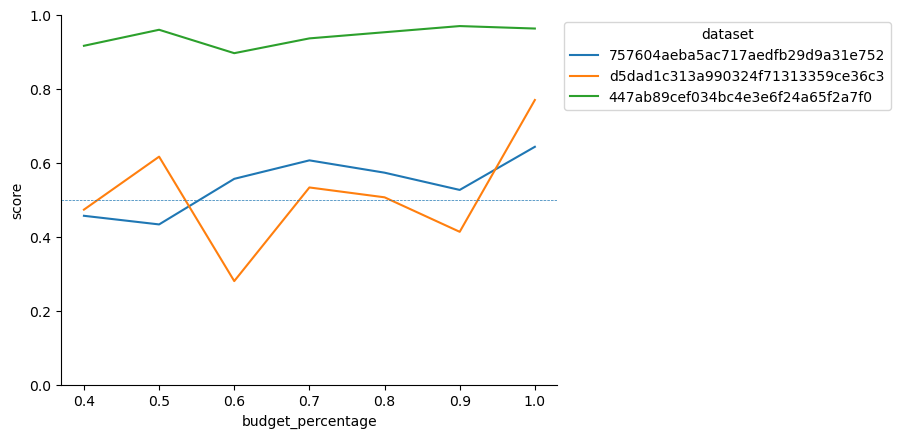

In [7]:
g = sns.lineplot(data=df_success, x="budget_percentage", y="score", hue="dataset")

plt.axhline(y=.5, linestyle="--", linewidth=.5)

g.set(ylim=(0.0, 1.0));

sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
sns.despine()

In [14]:
from experiments.synthetic_datasets.common import load_dataset
from pprint import pprint

metrics = ["score", "f1"]
for ds_id in df_success["dataset"].unique().tolist():
    ds = load_dataset(f"/home/anto/Downloads/4_dim_experiments/synthetic_datasets/datasets/{ds_id}.json")
    print(ds_id)
    
    pprint(ds.complexity_report)

757604aeba5ac717aedfb29d9a31e752
{'complexities': {'c1': 0.0,
                  'c2': 0.0,
                  'clsCoef': 0.304,
                  'density': 0.844,
                  'f1': 0.927,
                  'f1v': 0.712,
                  'f2': 0.426,
                  'f3': 0.979,
                  'f4': 0.969,
                  'hubs': 0.758,
                  'l1': 0.278,
                  'l2': 0.367,
                  'l3': 0.308,
                  'lsc': 0.987,
                  'n1': 0.134,
                  'n2': 0.49,
                  'n3': 0.259,
                  'n4': 0.213,
                  't1': 0.446,
                  't2': 0.003,
                  't3': 0.003,
                  't4': 1.0},
 'n_features': 3,
 'n_samples': 1000,
 'prior_probability': [0.5, 0.5],
 'score': 0.473}
d5dad1c313a990324f71313359ce36c3
{'complexities': {'c1': 0.0,
                  'c2': 0.0,
                  'clsCoef': 0.312,
                  'density': 0.882,
                  'f1': 0